In [2]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import arviz as az
import seaborn as sns

In [3]:
#returns a list of bools to use to help shade. There may be a built-in way to do this but I can't find it.

def define_shade_xrange(data, lbound=0, ubound = 1):
    matching_list = []
    for x in data:
        if lbound < x < ubound:
            matching_list.append(True)
        else:
            matching_list.append(False)
    matching_array = np.array(matching_list)
    return matching_array

In [4]:
def posterior_grid_approx(grid_points = 200, success = 6, tosses = 9):
    """
    """
    #define grid
    p_grid = np.linspace(0, 1, grid_points)

    #define prior
    prior = np.repeat(1, grid_points) #uniform prior
    #prior = np.piecewise(p_grid, [p_grid <= 0.5, p_grid > 0.5], [0, 1]) #piecewise uniform prior
    #prior = np.exp(-5 * np.abs (p_grid - 0.5))
    
    #compute a likelihood at each grid value
    likelihood = stats.binom.pmf(success, tosses, p_grid)
    
    #compute product of likelihood and prior
    unstd_posterior = likelihood * prior
    
    #normalize posterior
    posterior = unstd_posterior/unstd_posterior.sum()
        
    return p_grid, posterior

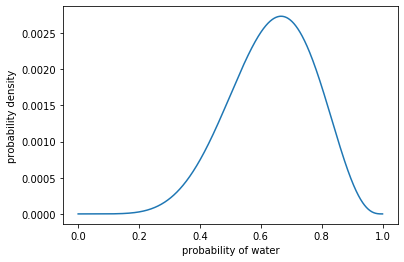

In [5]:
grid_data = posterior_grid_approx(1000, 6, 9)
#x = np.linspace(0, 1, samples.shape[0])
plt.xlabel('probability of water')
plt.ylabel('probability density')
plt.plot(grid_data[0], grid_data[1])

In [6]:
def posterior_grid_sample(grid_points, success, tosses, samples):
    """
    """
    #define grid
    p_grid = np.linspace(0, 1, grid_points)

    #define prior
    prior = np.repeat(1, grid_points) #uniform prior
    #prior = np.piecewise(p_grid, [p_grid <= 0.5, p_grid > 0.5], [0, 1]) #piecewise uniform prior
    #prior = np.exp(-5 * np.abs (p_grid - 0.5))

    #compute a likelihood at each grid value
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    #compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    #normalize posterior
    posterior = unstd_posterior/unstd_posterior.sum()

    sample = np.random.choice(p_grid, p = posterior, size = samples)

    return sample


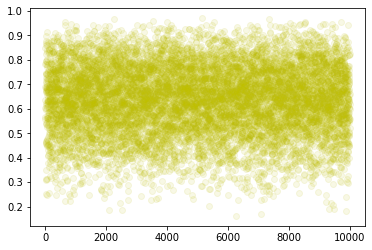

In [7]:
post_samples = posterior_grid_sample(1000, 6, 9, 10000)
x = np.linspace(0, post_samples.shape[0]-1, post_samples.shape[0])
plt.plot(x, post_samples, 'yo', alpha = 0.1)
plt.show()

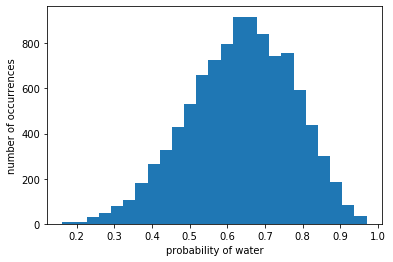

In [8]:
#this is easier than a kernel density estimate, but I should learn how to do that anyway.
plt.hist(post_samples, bins=25)
plt.xlabel('probability of water')
plt.ylabel('number of occurrences')
plt.show()

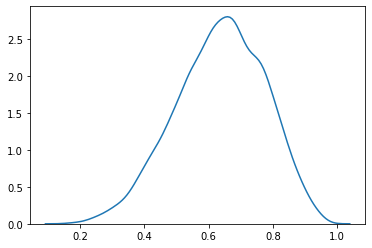

In [9]:
density_curve = sns.kdeplot(post_samples) # this generates a plot, which includes a line 

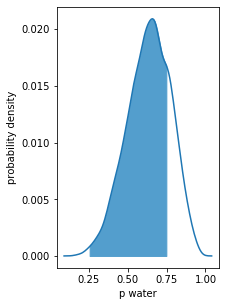

In [10]:
# this includes shading a graph in certain probability ranges

density_line = density_curve.get_lines()[-1]  # this pulls the line from the plot
density_data_x, density_data_y = density_line.get_data()
density_data_y_normalized = density_data_y / density_data_y.sum()

shade_bools = define_shade_xrange(density_data_x, 0.25, 0.75)

fig_1 = plt.figure(1, figsize=(6.4, 4.8))
chart_1 = fig_1.add_subplot(121)
chart_1.plot(density_data_x, density_data_y_normalized)
chart_1.set_ylabel('probability density')
chart_1.set_xlabel('p water')
chart_1.fill_between(density_data_x, density_data_y_normalized, where=shade_bools, color='#539ecd')
plt.show()

In [11]:
# here we need to shade the bottom x percent of the data

In [12]:
#R code 3.6
x = posterior_grid_approx(200, 6, 9)
posterior = x[1]
p_grid = x[0]
sum(posterior [p_grid < 0.5]) 
# p_grid < 0.5 returns a list of bools, so we're only summing the true bools in posterior

0.17186464152526157

In [16]:
#R code 3.7
x = sum(post_samples < 0.5)/post_samples.shape[0]
x

0.1703

In [17]:
#R code 3.8
x = (sum(post_samples < 0.75) - sum(0.5 > post_samples))/post_samples.shape[0]
x
# sum((post_samples > 0.5) & (post_samples < 0.75)) / 1e4 does the same thing 

0.6053

In [18]:
#R code 3.9
np.percentile(post_samples, 80) # bottom 80% percent

0.7609609609609616

In [19]:
#R code 3.10
np.percentile(post_samples, [10, 90]) # middle 80%

array([0.44944945, 0.81181181])